#Importing libaries and data sets

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[8,6.4]

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#I want to redo how I went about my feature selections. The way I did it seems to be off of just what I believe versus a more analytic and strategic approach. So what I'm going to do to fix this will be:

- Find the columns that has over 55% corelation to sale price
- Lets use a heatmap for this and then have each tile show their correlation percentage
- The ones over 55% will be the columns im gonna go with


<AxesSubplot:>

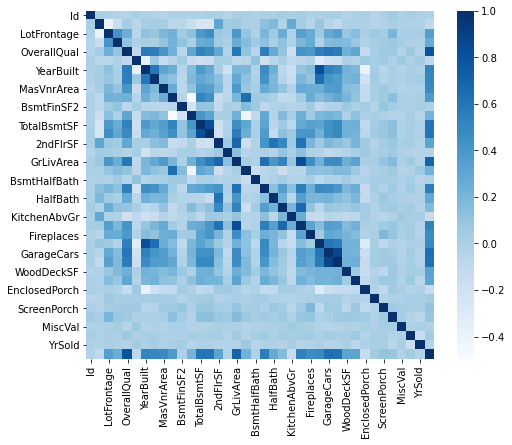

In [18]:
#Heat map shows that majority of columns do not have high correlations
corrmat = train.corr()
sns.heatmap(corrmat, square=True, cmap='Blues')

In [19]:
corr_col = corrmat.index[abs(corrmat['SalePrice']) > 0.55]
corr_col

Index(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

<AxesSubplot:>

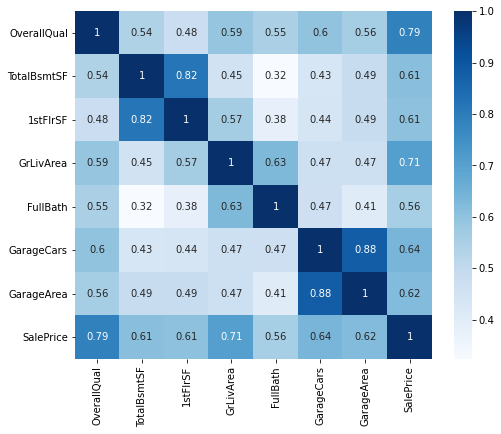

In [20]:
sns.heatmap(train[corr_col].corr(), annot=True, cmap='Blues')

### Based on the correlation shown in the heatmap, the following columns will be used in the ML model due to having a correlation higher than 55%
- OverralQual
- TotalBsmtSF
- 1stFlrSF
- GrLivArea
- FullBath
- GarageCars
- GarageArea

In [21]:
df=train[['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'GarageCars', 'GarageArea', 'SalePrice']]
df

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,GarageCars,GarageArea,SalePrice
0,7,856,856,1710,2,2,548,208500
1,6,1262,1262,1262,2,2,460,181500
2,7,920,920,1786,2,2,608,223500
3,7,756,961,1717,1,3,642,140000
4,8,1145,1145,2198,2,3,836,250000
...,...,...,...,...,...,...,...,...
1455,6,953,953,1647,2,2,460,175000
1456,6,1542,2073,2073,2,2,500,210000
1457,7,1152,1188,2340,2,1,252,266500
1458,5,1078,1078,1078,1,1,240,142125


#Analyzing Price

In [22]:
train['SalePrice'].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

c:\Users\victo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

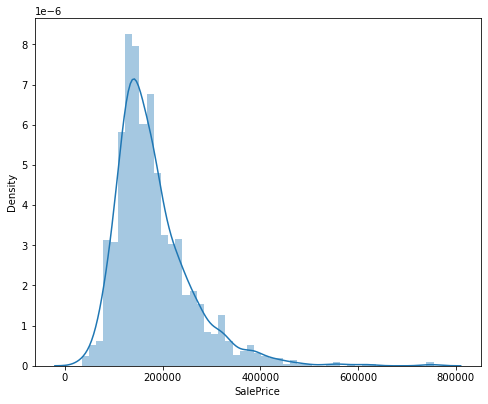

In [23]:
sns.distplot(train['SalePrice'])

Majority of sales prices seem to be around the $150,000 range

In [24]:
# def scatter_plot(x, y, title, xaxis, yaxis, size, cscale):
#     trace = go.Scatter(x=x, y=y, mode='markers', marker=dict(color=y, size=size, showscale=True, colorscale=cscale))
#     layout = go.Layout(hovermode='closest', title=title, xaxis=dict(title=xaxis), yaxis=dict(title=yaxis))
#     fig = go.Figure(data=[trace], layout=layout)
#     return iplot(fig)

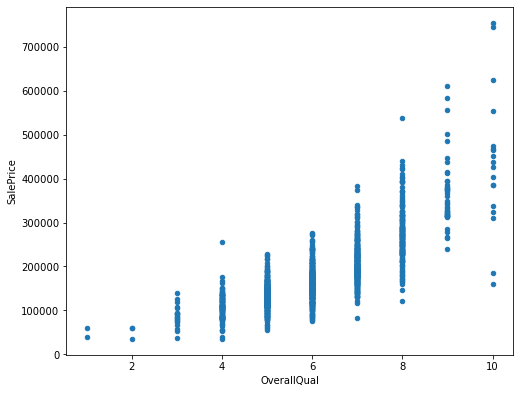

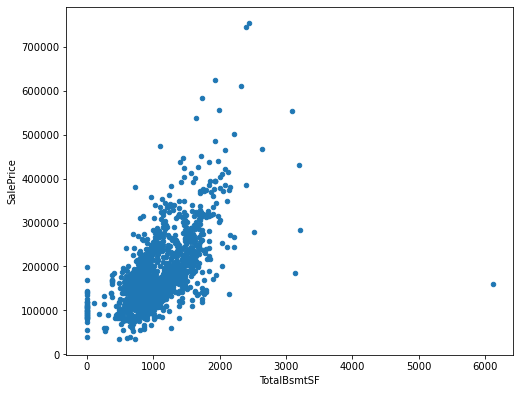

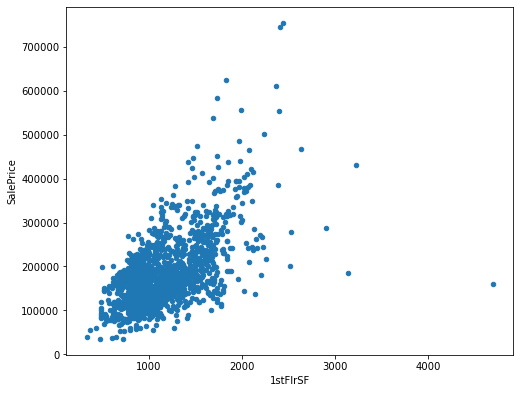

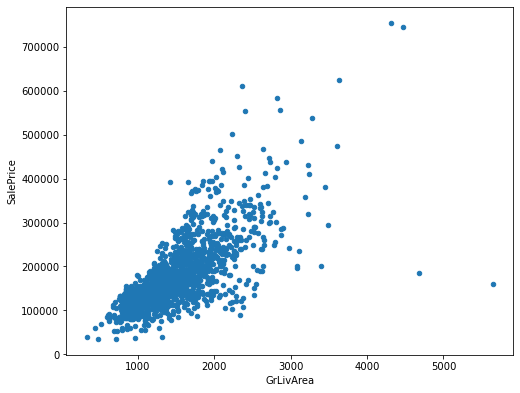

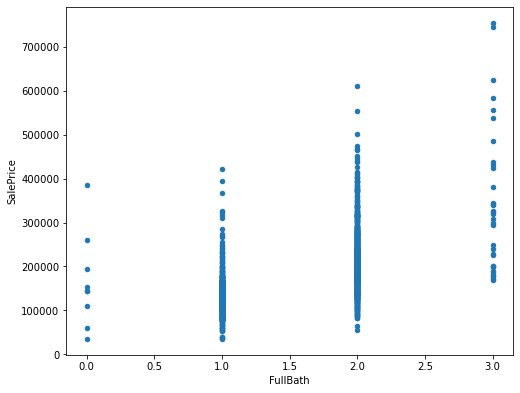

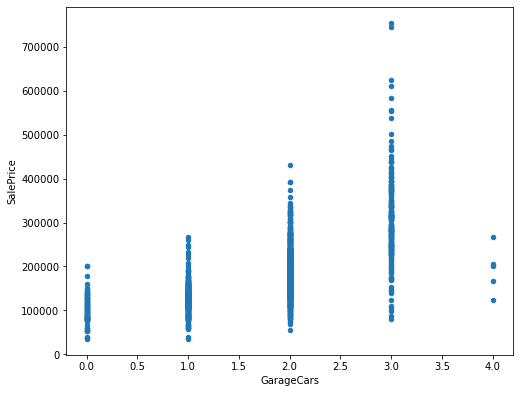

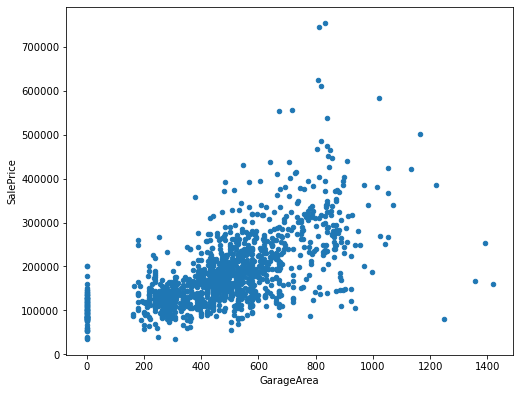

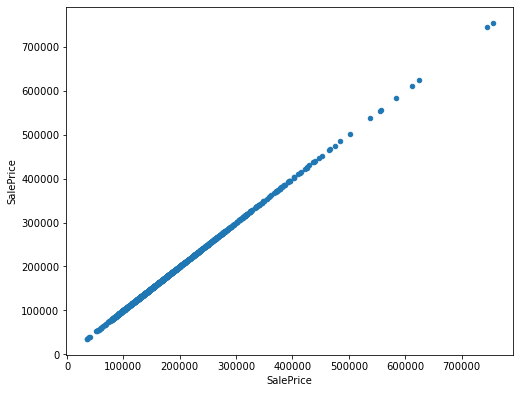

In [30]:
for i in df:
    df.plot.scatter(x=i, y='SalePrice')

##it does some that the columns do have a linear regression thanks to their high correlation score